In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import json

In [3]:
arr = np.load("smoothing_posterior_first.npz")

In [13]:
data = np.load("data_info.npz")

In [16]:
[k for k in data.files]

['sir_data',
 'day_zero',
 'date_range_x',
 'time_domain',
 'data_grid',
 'ode_grid',
 'dense_grid',
 'train_idcs',
 'val_idcs']

In [38]:
with open("info.json") as f:
    info = json.load(f)


In [42]:
def plot_sir(data, posterior):
    fig, axs = plt.subplots(1,3,figsize=(16,4))
    for i, label in enumerate(["Susceptible", "Infected", "Recovered"]):
        axs[i].plot(np.exp(posterior["means"][:, 3*i])[::24], label="Prediction")
        axs[i].plot(data["sir_data"][:, i], label="Data")
        axs[i].set_title(label)
        axs[i].legend()
    return

def plot_beta(posterior):
    return

def beta_link_fn(x, info, y_offset=0.0):
    slope = info["sigmoid_slope"]
    x_offset = -scipy.special.logit(info["beta_prior_mean"])
    return scipy.special.expit(slope * (x - x_offset)) + y_offset



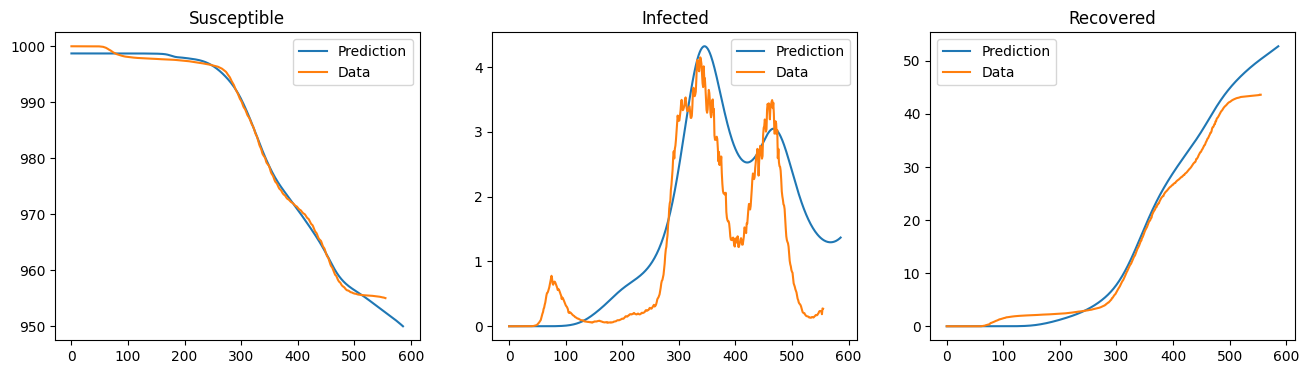

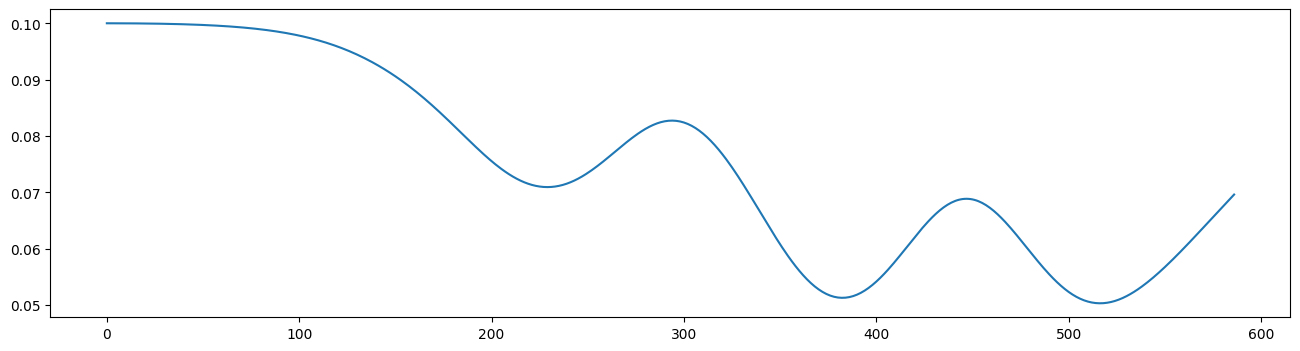

In [58]:
plot_sir(data, arr)
fig, axs = plt.subplots(1, figsize=(16,4))
axs.plot(beta_link_fn(arr["means"][:,-2][::24], info))